# Amplitude Estimation Benchmark - Results Summary

This results summary provides an aggregated view of all benchmarked algorithm for different settings:
1. Number of oracle calls / estimated error
2. Number of oracle calls / exact error
3. Number of oracle calls / exact value (`p_target`)

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### Load results files

In [2]:
# get all results files
filenames = [os.path.join(dp, f) for dp, dn, filenames in os.walk('results/') 
             for f in filenames if os.path.splitext(f)[1] == '.csv']
filenames.remove('results/results_template.csv')

In [3]:
# initialize dataframe from template
df = pd.read_csv('results/results_template.csv')
df = df.drop(index=range(len(df)))

# append data from files
for filename in filenames:
    df = df.append(pd.read_csv(filename), sort=True)    

/tmp/ipykernel_42196/1671740378.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_csv(filename), sort=True)
/tmp/ipykernel_42196/1671740378.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_csv(filename), sort=True)


In [4]:
# extract possible values
algorithms = sorted(df['algorithm'].unique())
a_targets = sorted(df['p_target'].unique())
alphas = sorted(df['alpha'].unique())

# Number of oracle calls / estimated error 

/tmp/ipykernel_42196/1863218339.py:18: RuntimeWarning: invalid value encountered in log
  f = lambda eps, c, p: np.log(c) - p*np.log(eps)


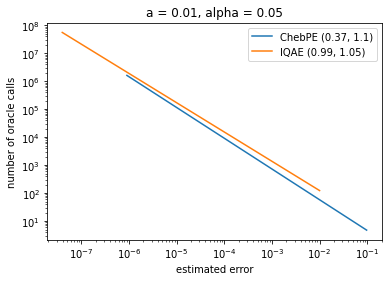

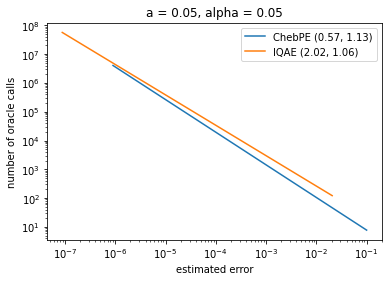

/home/prall/.local/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/prall/.local/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


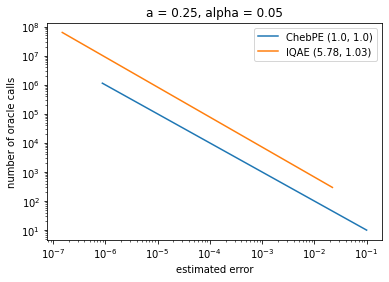

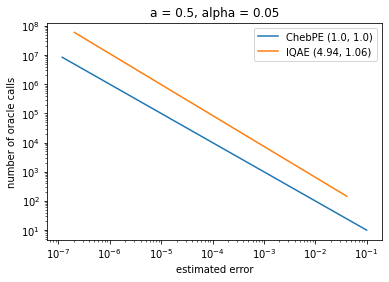

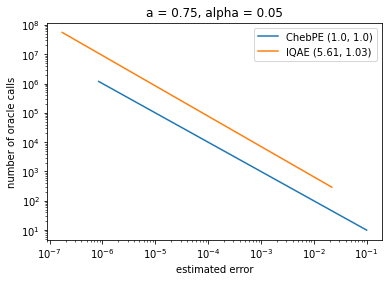

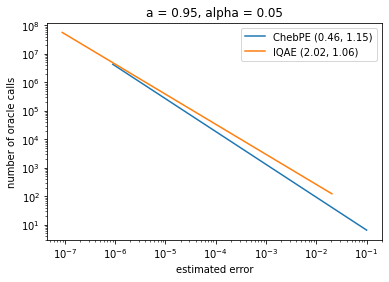

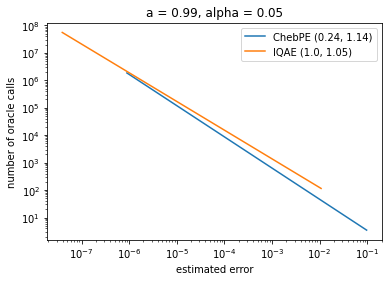

In [5]:
# loop over settings
for i, a in enumerate(a_targets):
    for alpha in alphas:
        for algorithm in algorithms:

            # filter data
            df_ = df[(df['p_target'] == a) & 
                     (df['alpha'] == alpha) & 
                     (df['algorithm'] == algorithm) & 
                     (df['num_oracle_calls'] > 0)  # FIXME: this should not happen
                    ].sort_values('ci_width')

            # extract x/y data
            x = df_['ci_width']
            y = df_['num_oracle_calls']
        
            # fit c/eps^p to data (for loglog plot)
            f = lambda eps, c, p: np.log(c) - p*np.log(eps)
            params = curve_fit(f, x, np.log(y), p0=[1,1])[0]
            c, p = np.round(params, decimals=2)
            fy = np.exp(f(x, *params))


            plt.loglog(x, fy, label=f'{algorithm} ({c}, {p})')

        plt.title(f'a = {a}, alpha = {alpha}')
        plt.xlabel('estimated error')
        plt.ylabel('number of oracle calls')
        plt.legend()
        
        plt.show()

# Number of oracle calls / estimated error 

/tmp/ipykernel_42196/3975643551.py:18: RuntimeWarning: invalid value encountered in log
  f = lambda eps, c, p: np.log(c) - p*np.log(eps)


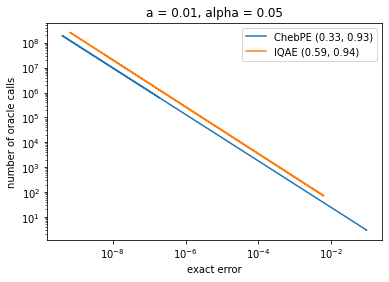

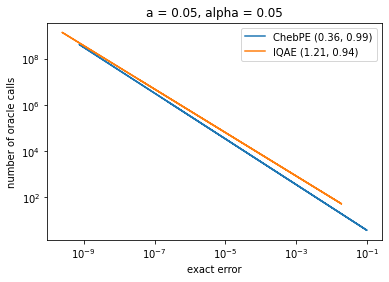

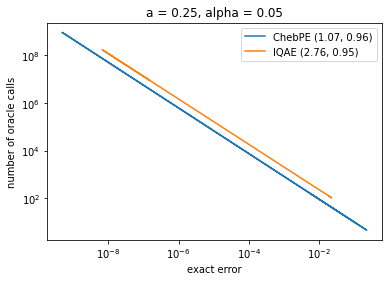

/home/prall/.local/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


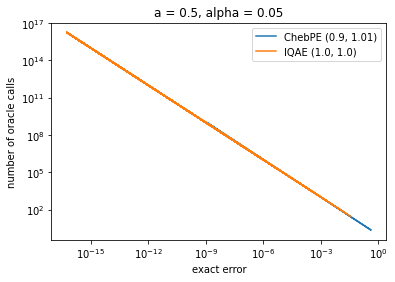

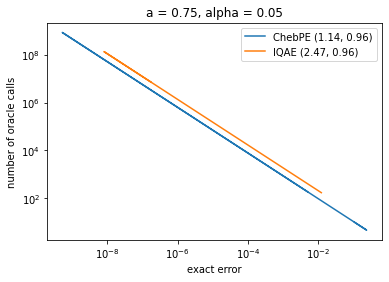

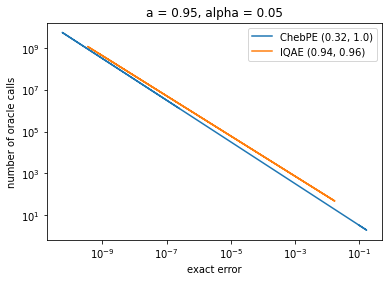

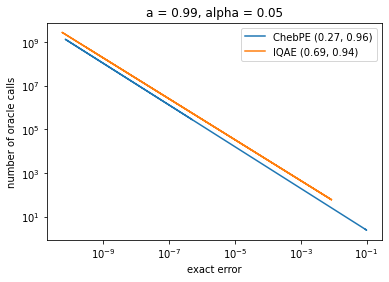

In [6]:
# loop over settings
for i, a in enumerate(a_targets):
    for alpha in alphas:
        for algorithm in algorithms:

            # filter data
            df_ = df[(df['p_target'] == a) & 
                     (df['alpha'] == alpha) & 
                     (df['algorithm'] == algorithm) & 
                     (df['num_oracle_calls'] > 0)  # FIXME: this should not happen
                    ].sort_values('ci_width')

            # extract x/y data
            x = df_['exact_error']
            y = df_['num_oracle_calls']
        
            # fit c/eps^p to data (for loglog plot)
            f = lambda eps, c, p: np.log(c) - p*np.log(eps)
            params = curve_fit(f, x, np.log(y), p0=[1,1])[0]
            c, p = np.round(params, decimals=2)
            fy = np.exp(f(x, *params))


            plt.loglog(x, fy, '-', label=f'{algorithm} ({c}, {p})')

        plt.title(f'a = {a}, alpha = {alpha}')
        plt.xlabel('exact error')
        plt.ylabel('number of oracle calls')
        plt.legend()
        
        plt.show()

## Number of oracle calls / exact value (`a_target`)

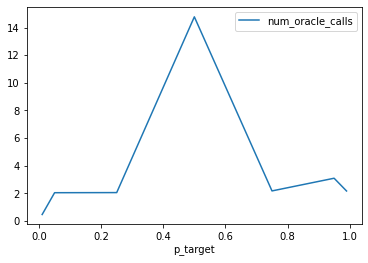

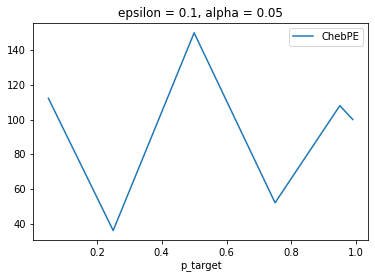

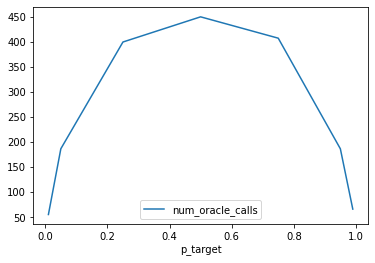

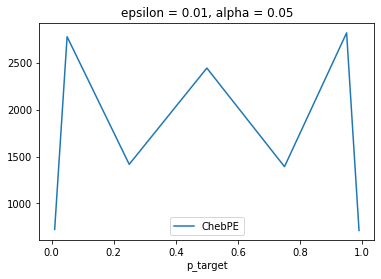

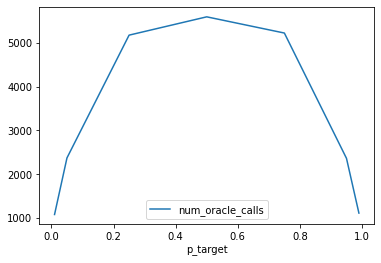

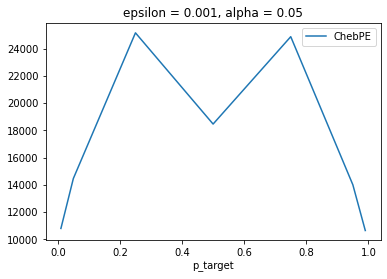

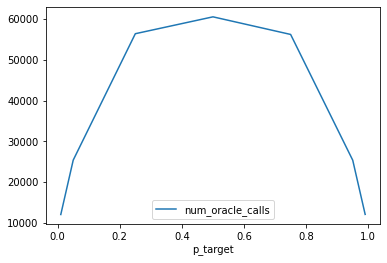

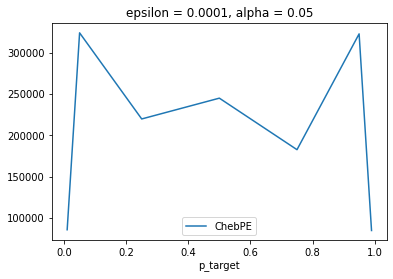

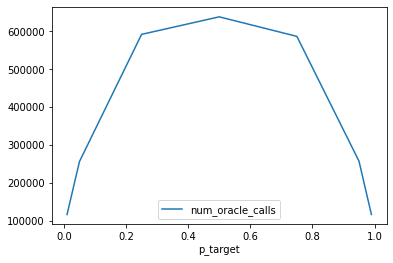

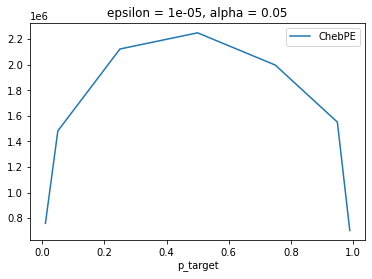

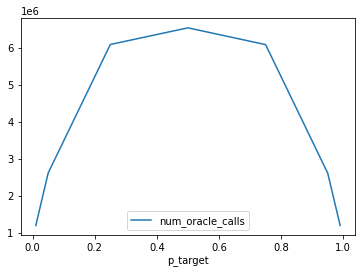

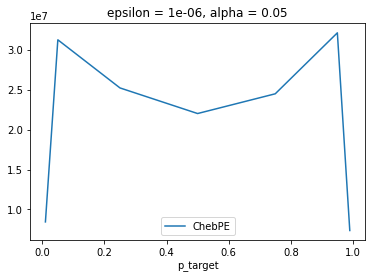

In [7]:
# loop over settings
target_epsilons = [10**-k for k in range(1, 7)]
for i, epsilon in enumerate(target_epsilons):
    for j, alpha in enumerate(alphas):
        
        for algorithm in algorithms:

            # filter data
            df_ = df[(df['ci_width'] <= epsilon) & 
                     (df['ci_width'] > epsilon/10) & 
                     (df['alpha'] == alpha) & 
                     (df['algorithm'] == algorithm)].sort_values('p_target')
            
            df_[['p_target', 'num_oracle_calls']].groupby(['p_target']).mean().plot()
        
        plt.title(f'epsilon = {epsilon}, alpha = {alpha}')
        plt.legend(algorithms);
        plt.show()